<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/HW_18_RNN_lstm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: To perform classification on the IMDB dataset using RNN.**

**Dataset: https://keras.io/api/datasets/imdb/**

In [ ]:
import numpy as np

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

**Saving some parameters for the text.**

In [ ]:
# Збережемо деякі параметри для тексту
max_features = 30000
maxlen = 200

**Loading the IMDB data.**

In [ ]:
# Завантажуємо дані IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


**Checking the length of samples.**

In [ ]:
# Перевіряємо довжину виборок
print(len(x_train))
print(len(x_test))

25000
25000


**Padding samples to the same length.**

In [ ]:
# Приводимо наші зразки до однакової довжини
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (25000, 200)
Test shape:  (25000, 200)


**Let's see how a random review looks now.**

In [ ]:
# Подивимось як тепер виглядає рандомний коментар
print("Review in the training set:\n", x_train[1], "length:", len(x_train[0]), "class:", y_train[0])

Review in the training set:
 [    0     0     0     0     0     0     0     0     0     0     0     1
   194  1153   194  8255    78   228     5     6  1463  4369  5012   134
    26     4   715     8   118  1634    14   394    20    13   119   954
   189   102     5   207   110  3103    21    14    69   188     8    30
    23     7     4   249   126    93     4   114     9  2300  1523     5
   647     4   116     9    35  8163     4   229     9   340  1322     4
   118     9     4   130  4901    19     4  1002     5    89    29   952
    46    37     4   455     9    45    43    38  1543  1905   398     4
  1649    26  6853     5   163    11  3215 10156     4  1153     9   194
   775     7  8255 11596   349  2637   148   605 15358  8003    15   123
   125    68 23141  6853    15   349   165  4362    98     5     4   228
     9    43     2  1157    15   299   120     5   120   174    11   220
   175   136    50     9  4373   228  8255     5 25249   656   245  2350
     5     4  9837   1

**The required length has been added in this case. We can also see that Keras has already processed the reviews, so there's no need to convert text into numbers anymore. We can also look at how the same review would have looked before transformation.**

In [ ]:
# Потрібна нам довжина в цьому випадку додана.
# Бачимо також , що keras вже обробив коментарі, і нам вже не потрібно переводити текст у числа.
# Можна ще подивитися, як виглядав би цей же коментар до перетворення

In [ ]:
word_index = imdb.get_word_index()
def decoded_review(index):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    review = " ".join([reverse_index.get(i-3, "!") for i in x_train[index]])
    print(review)

    return review

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
#
decoded_review = decoded_review(1)

! ! ! ! ! ! ! ! ! ! ! ! big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just ! trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for ! all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


**Adding parameters to the model.**

In [ ]:
# Додамо параметри для моделі
embedding_dims = 64
lstm_units = 30

**Creating an RNN model and compiling it.**

In [ ]:
# Створюємо модель RNN
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.5))
model.add(LSTM(lstm_units, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(lstm_units))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Робимо компіляцію
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training of the RNN model.**

In [ ]:
# Тренуємо модель
epochs = 5
validation_split = 0.2
batch_size=128

history = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_split=validation_split)

Epoch 1/5
157/157 [==============================] - 64s 381ms/step - loss: 0.5904 - accuracy: 0.6615 - val_loss: 0.5686 - val_accuracy: 0.7692
Epoch 2/5
157/157 [==============================] - 51s 324ms/step - loss: 0.3616 - accuracy: 0.8510 - val_loss: 0.5631 - val_accuracy: 0.7706
Epoch 3/5
157/157 [==============================] - 50s 318ms/step - loss: 0.2778 - accuracy: 0.8926 - val_loss: 0.3883 - val_accuracy: 0.8526
Epoch 4/5
157/157 [==============================] - 51s 323ms/step - loss: 0.2335 - accuracy: 0.9138 - val_loss: 0.3011 - val_accuracy: 0.8738
Epoch 5/5
157/157 [==============================] - 51s 323ms/step - loss: 0.2006 - accuracy: 0.9292 - val_loss: 0.2880 - val_accuracy: 0.8786


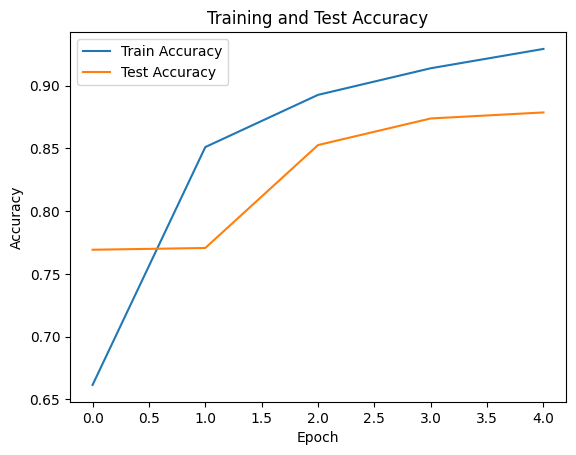

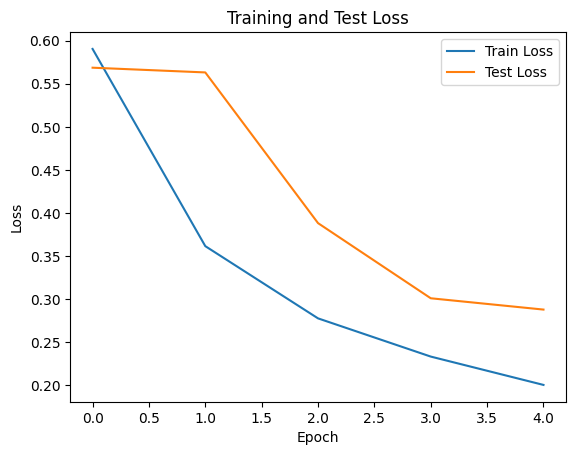

In [ ]:
# Fetching the training and validation accuracy history of the model:
# Отримуємо історію точності моделі навчання та валідації
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Fetching the training and validation loss history:
# Отримуємо історію втрат навчання та валідації
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Accuracy plot
# Графік для точності
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, label="Test Accuracy")
plt.title("Training and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Loss plot
# Графік для втрат
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Test Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

**Evaluating the RNN model on the test data.**

In [ ]:
# Оцінка моделі на тестових даних
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print("Accuracy on the test data set: {:.2f}%".format(val_accuracy * 100))
print("Loss on the test data set: {:.4f}".format(val_loss))

782/782 [==============================] - 30s 39ms/step - loss: 0.3067 - accuracy: 0.8716
Accuracy on the test data set: 87.16%
Loss on the test data set: 0.3067


**So, in this case, the metrics are not "jumping" and appear quite stable. However, we observe significant losses in both datasets. It is evident that they are decreasing with each epoch, but increasing the number of epochs did not help reduce the losses; on the contrary, overfitting occurred after the 5th epoch.**

In [ ]:
# Отже, в даному випадку, показники не "скачуть" і виглядають достатньо стабільними, проте бачимо великі втрати на обох виборках.
# Видно, що вони йдуть на спад з кожною епохою, але збільшення кількості епох не допомогло зменшити втрати, навпаки після 5ї йшло перенавчання.